In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from skimage import data
from skimage import color
# REad Image
rocket_image = data.rocket()


In [3]:
def show_image(image, title="Image", cmap_type ="gray" , ax =""):
    gray_image = color.rgb2gray(image)
    if ax != "":
        ax.imshow(gray_image, cmap=cmap_type)
        ax.set_title(title)
        ax.axis("off")
    else:
        plt.figure(figsize=(12,10))
        plt.imshow(gray_image, cmap=cmap_type)
        plt.title(title)
        plt.axis("off")


#plt.show()

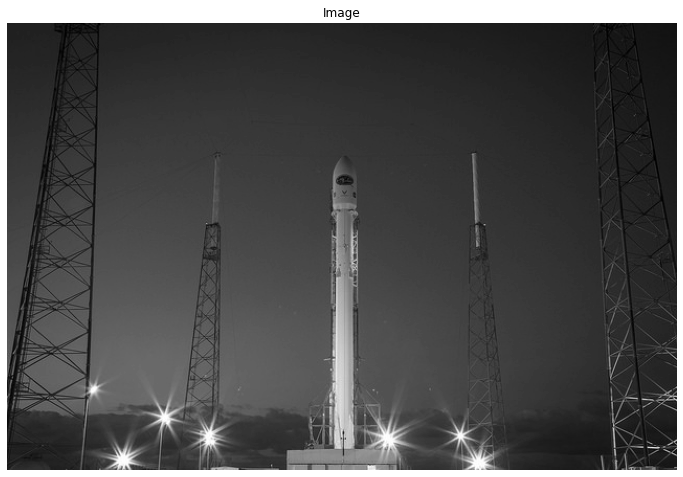

In [4]:
show_image(rocket_image)
plt.show()

In [5]:
def show_info(image):
    data_type = type(image)
    shape = image.shape
    width = shape[1]
    height = 428
    info = {
        "data_type" : data_type,
        "shape" : shape,
        "width" : width,
        "height": height
    }
    
    return info

In [6]:
show_info(rocket_image)

{'data_type': numpy.ndarray,
 'shape': (427, 640, 3),
 'width': 640,
 'height': 428}

In [7]:
def return_r_g_b(Image, section ='r'):
   
    if section == 'g':
        im = Image[:, : ,1]
    elif section == 'b':
        im = Image[:,:,2]
    else:
        im = Image[:,:,0]
    return im

<ipython-input-3-ca0026449064>:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_image = color.rgb2gray(image)


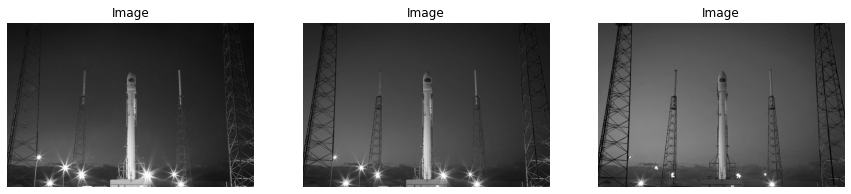

In [8]:
fig, ax = plt.subplots(ncols = 3, figsize=(15,5))
for i, el in enumerate(['r','g','b']):
    im =return_r_g_b(rocket_image,el)
    show_image(im,ax = ax[i])

plt.show()

In [9]:
# CRop, FREsize, Mirror ,Flip
#np.flip, np.fliplr, np.flipud


# Histograms

In [10]:
#Contrast , brightness, simple masking
# histograms
def show_histogram(Image, bins=255):
    
    flattened_image = Image.ravel()
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(8,6))
    sns.histplot(flattened_image.ravel(), bins = 256, color='tomato')


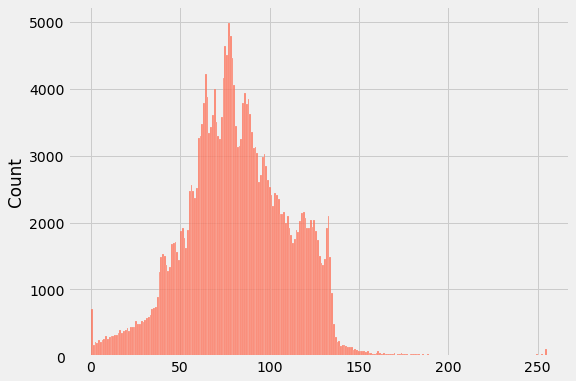

In [11]:
im = return_r_g_b(rocket_image,'b')

show_histogram(im)

# Thresholding

In [12]:
def image_threshold(Image, threshould = 0):

    binary_values = Image > threshould
    return binary_values


def image_inverse_threshold(Image, threshould = 0):

    binary_values = Image < threshould
    return binary_values


<ipython-input-3-ca0026449064>:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_image = color.rgb2gray(image)


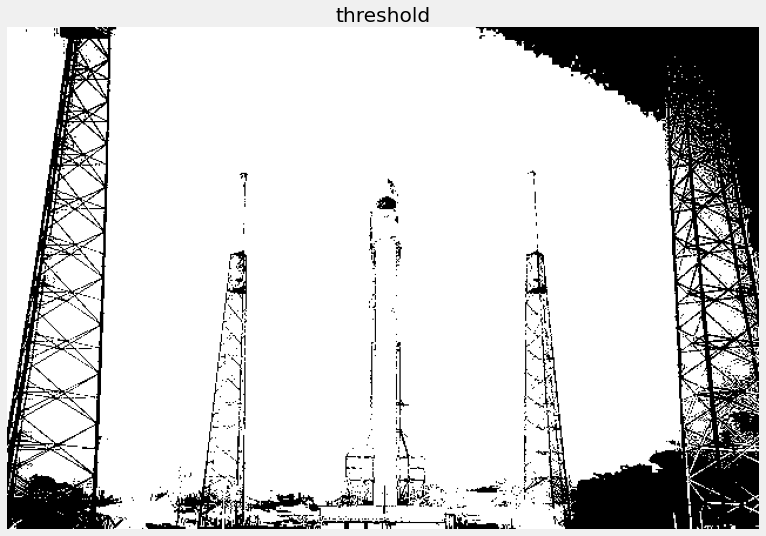

In [13]:
img_threshold = image_threshold(im , 57)
show_image(img_threshold,title="threshold")

<ipython-input-3-ca0026449064>:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_image = color.rgb2gray(image)


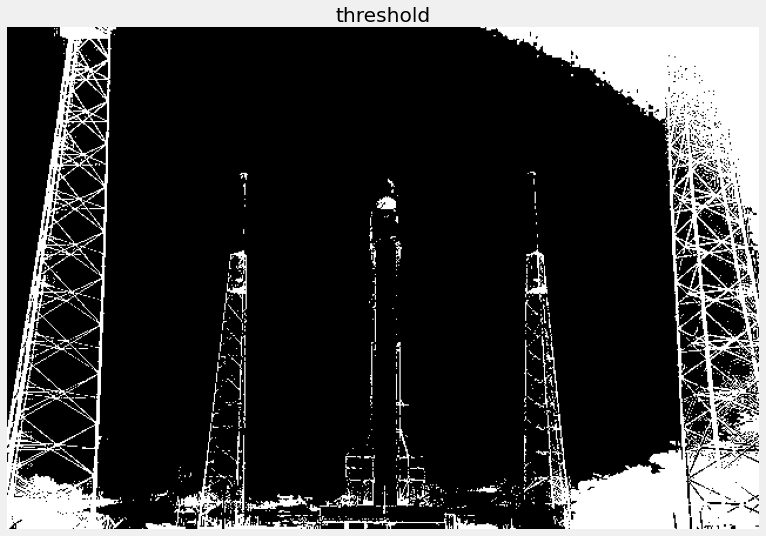

In [14]:
img_threshold = image_inverse_threshold(im , 57)
show_image(img_threshold,title="threshold")

<Figure size 1296x864 with 0 Axes>

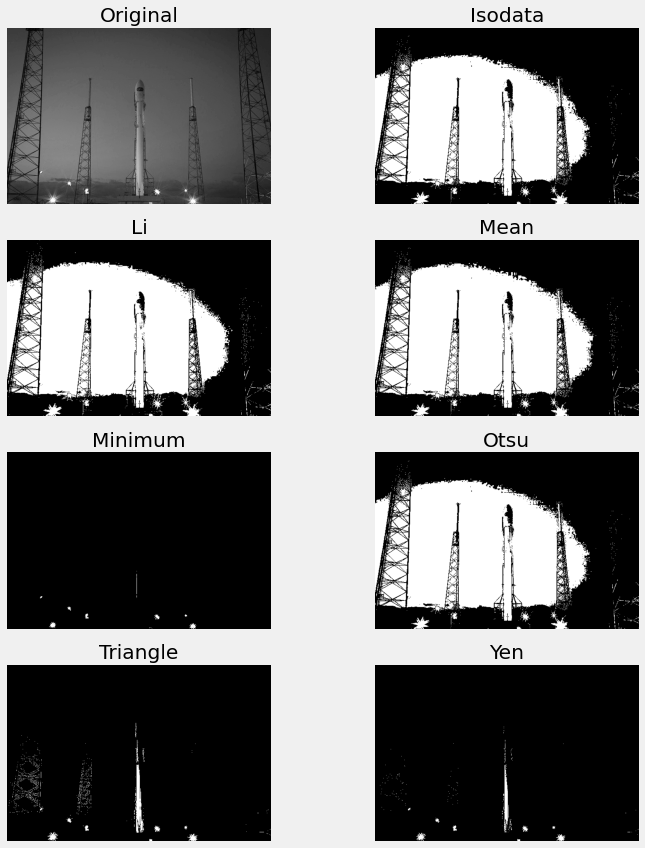

In [15]:
from skimage.filters import try_all_threshold

plt.figure(figsize =(18,12))
fig, ax = try_all_threshold(im,verbose=False,figsize =(12,12))

plt.show()

<ipython-input-3-ca0026449064>:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_image = color.rgb2gray(image)


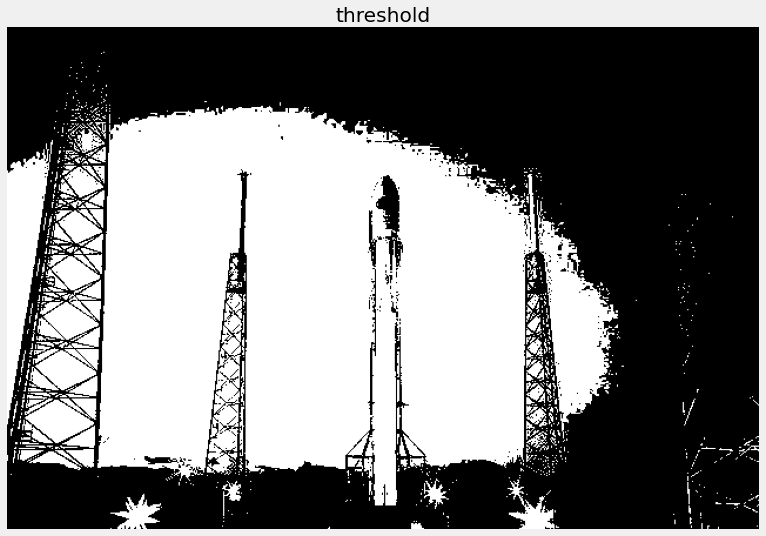

In [16]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(im)

im_otsu = image_threshold(im , thresh)

show_image(im_otsu,title="threshold")

<ipython-input-3-ca0026449064>:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_image = color.rgb2gray(image)


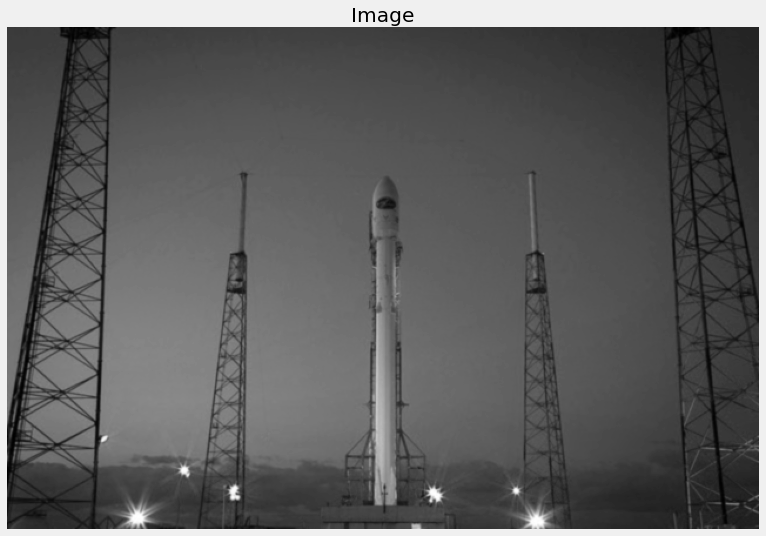

In [17]:
from skimage.filters import threshold_local

block_size = 5

thresh_local = threshold_local(im, block_size, offset=10)


show_image(thresh_local)

# Filtering

In [18]:
def show_image_comparison(image1, image2):
    fig, ax = plt.subplots(1,2,figsize=(15,10))
    
    ax[0].imshow(image1)
    ax[0].set_title("original")
    ax[0].axis("off")
    ax[1].imshow(image2)
    ax[1].set_title("second pic")
    ax[1].axis("off")

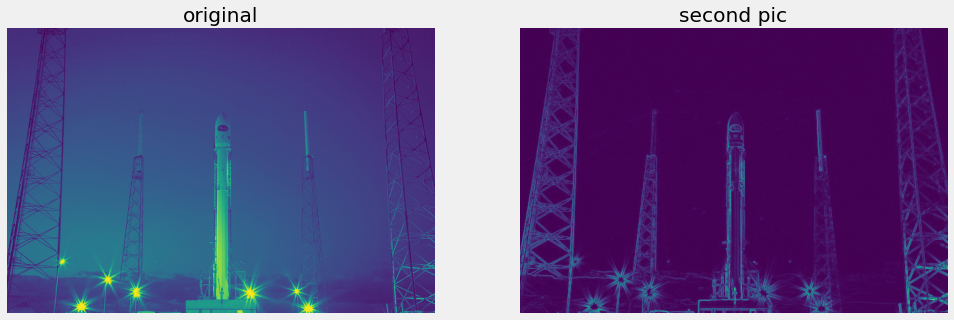

In [19]:
from skimage.filters import sobel

gray_scale_image = color.rgb2gray(rocket_image)

edge_sobel = sobel(gray_scale_image)

show_image_comparison(gray_scale_image, edge_sobel)





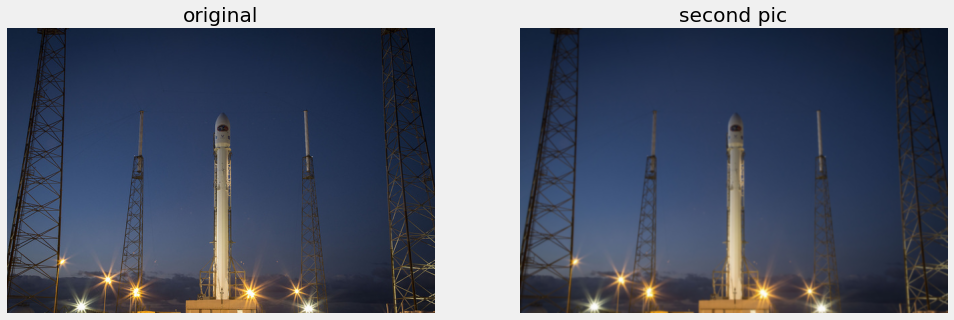

In [20]:
from skimage.filters import gaussian



filter_gaussian = gaussian(rocket_image , multichannel=True)

show_image_comparison(rocket_image, filter_gaussian)





# Image Contrast Enhancement


In [21]:
# Contrast stretching

    # Histogram Equalization
    # Adaptive Equalization
    # Limited Adaptive Equalization

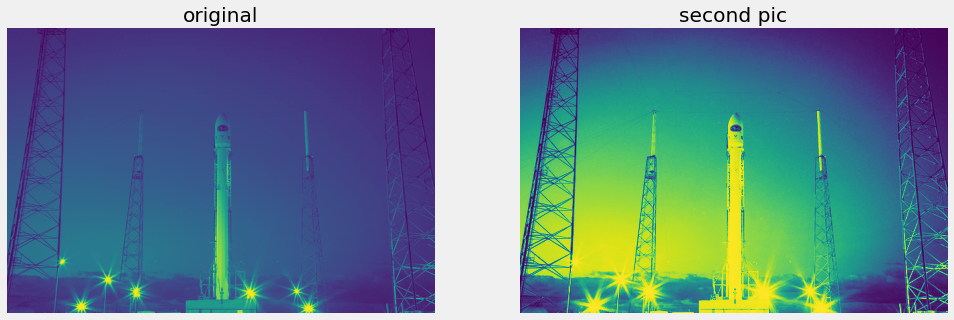

In [22]:
from skimage import exposure

image_equalize = exposure.equalize_hist(gray_scale_image)

show_image_comparison(gray_scale_image, image_equalize)

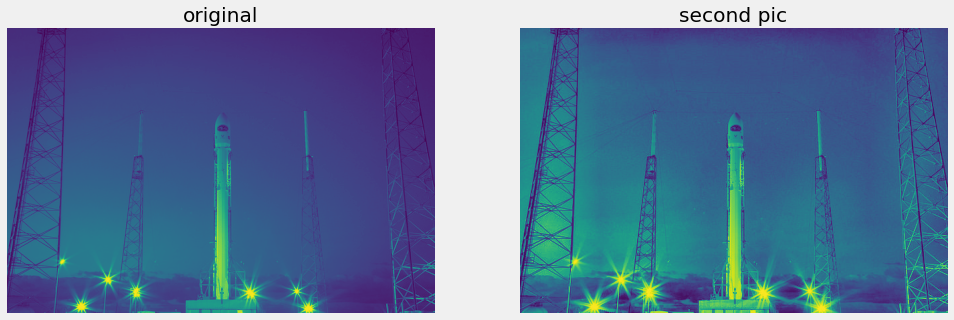

In [23]:
from skimage import exposure

image_equalize_adap = exposure.equalize_adapthist(gray_scale_image, clip_limit=0.02)

show_image_comparison(gray_scale_image, image_equalize_adap)

# Transformation

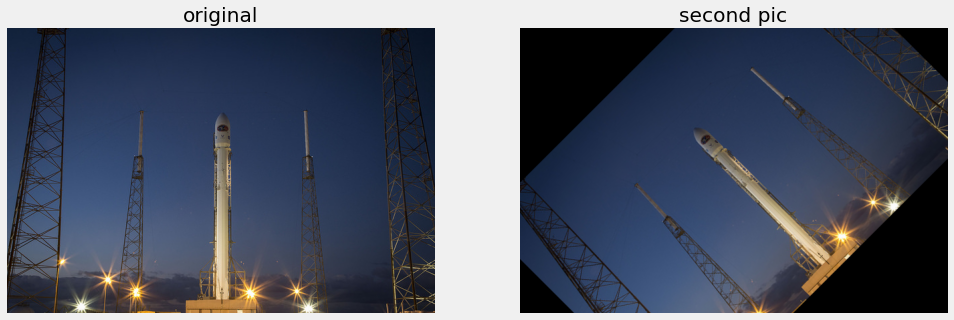

In [24]:
from skimage.transform import rotate

image_rotated = rotate(image=rocket_image, angle=45)

show_image_comparison(rocket_image, image_rotated)

In [25]:
from skimage.transform import rescale

image_resized = rescale(image=rocket_image,scale = 0.3,anti_aliasing=True, multichannel =True)

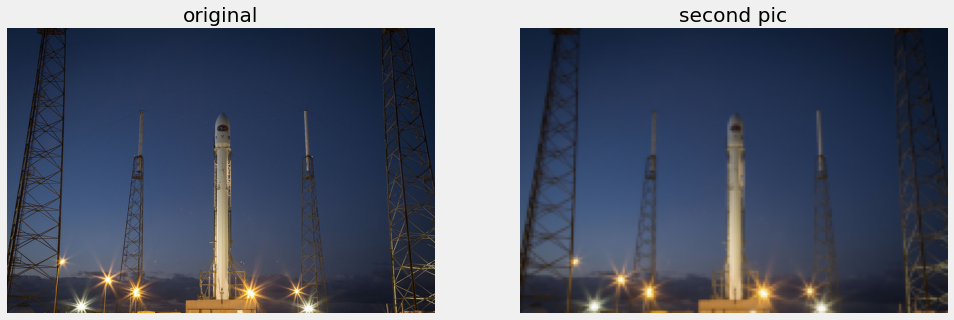

In [26]:
show_image_comparison(rocket_image, image_resized)

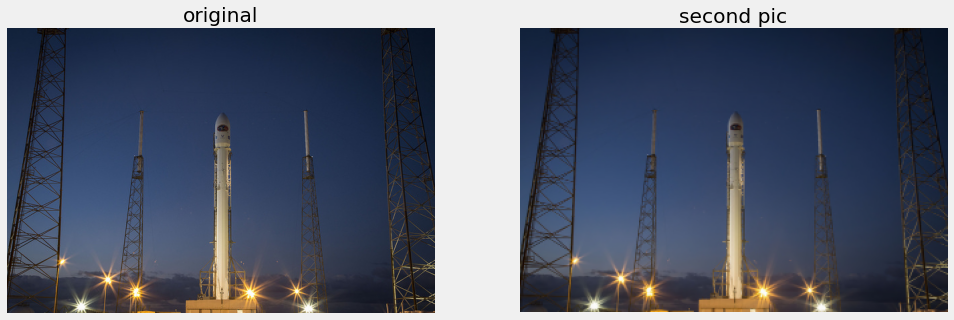

In [27]:
from skimage.transform import resize

width = rocket_image.shape[0] //2
height = rocket_image.shape[1] //2

image_resized = resize(rocket_image , (width,height),anti_aliasing=True)
show_image_comparison(rocket_image, image_resized)

# Morphology

In [ ]:
# Dilatation  adds pixels to boundaries of object
# Erosion     removes pixel from boundaries of object


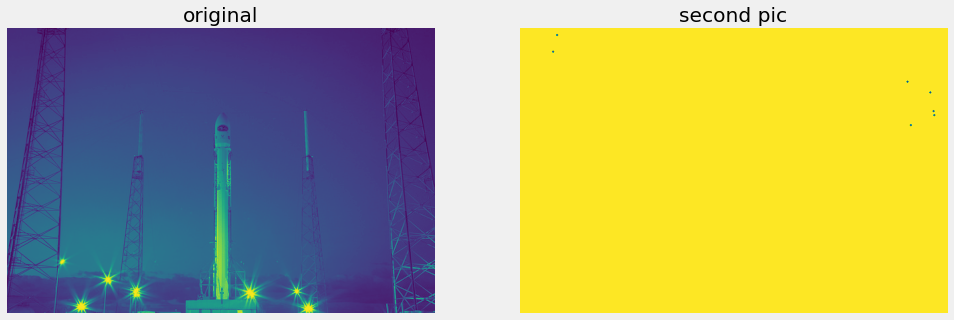

In [33]:
from skimage import morphology

image_eroded = morphology.binary_erosion(gray_scale_image)
show_image_comparison(gray_scale_image, image_eroded)

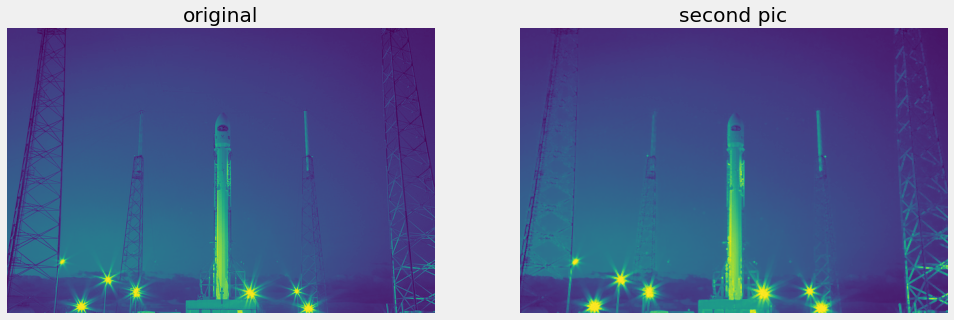

In [32]:
from skimage import morphology

image_dilation = morphology.dilation(gray_scale_image)
show_image_comparison(gray_scale_image, image_dilation)